Here we write a function to perform gradient descent using backpropagation for a neural network with a single hidden layer and an arbitrary number of nodes.
We assume the activation function in each layer is the same and the loss function is the following variation of squared error:
$$ L(\mathbf{y}, \tilde{\mathbf{y}}) = \frac{1}{2} \Vert \mathbf{y} - \tilde{\mathbf{y}} \Vert^2 ,$$
Note that this is the loss of only one sample. The total loss is given by
$$ \frac{1}{n} \sum_{i=1}^n L(\mathbf{y}_i, \tilde{\mathbf{y}_i}) ,$$
where $n$ is the number of samples.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

[(0.5976995968311531, 0.6609547685319225, 1), (0.029321747981573387, 0.4677344158515626, 1), (0.2400893827846332, 0.2972874413585408, 1), (0.8066115183245178, 0.8612229954363302, 1), (0.3969629550341518, 0.7016722795067178, 1), (0.8263601513499168, 0.9304959215688829, 1), (0.41275037100029843, 0.3774477434359702, 1), (0.17093092376920038, 0.3727729985532132, 1), (0.17356685864929178, 0.07996250139300876, 1), (0.40942081071909786, 0.7160155267619446, 1), (0.5863613686649145, 0.06248217765120345, 0), (0.9246752988867835, 0.5729423548782724, 0), (0.5631105033974596, 0.16241746637457188, 0), (0.45271672270523244, 0.09697494980860077, 0), (0.8070444596721129, 0.5681277681043985, 0), (0.5729263154498813, 0.1917612371801709, 0), (0.9349021656390322, 0.12767398715146383, 0), (0.7899932300604782, 0.3508912200573031, 0), (0.8602576877717567, 0.10567249821983538, 0), (0.9386594987544427, 0.056685469758344764, 0)]
[[0.5976996  0.66095477 1.        ]
 [0.02932175 0.46773442 1.        ]
 [0.24008938

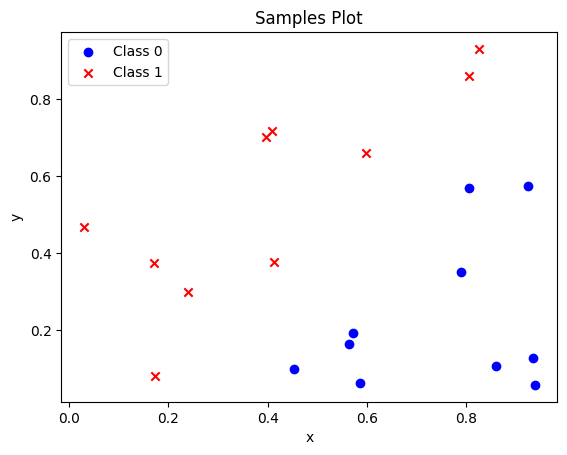

In [ ]:
samples_class_1 = []
while len(samples_class_1) < 10:
    x = np.random.rand()
    y = np.random.rand()
    if y >= x**2:
        samples_class_1.append((x, y, 1))

samples_class_0 = []
while len(samples_class_0) < 10:
    x = np.random.rand()
    y = np.random.rand()
    if y < x**2:
        samples_class_0.append((x, y, 0))

samples = samples_class_1 + samples_class_0
print(samples)

samples_array = np.array(samples)
print(samples_array)

class_0 = samples_array[samples_array[:, 2] == 0]
class_1 = samples_array[samples_array[:, 2] == 1]

plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', marker='o', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', marker='x', label='Class 1')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Samples Plot')
plt.show()

train_points = samples_array[:, :2]
train_labels = samples_array[:, 2]

In [ ]:
# loss function
def loss(y_true, y_pred):
    return 0.5 * np.linalg.norm(y_true - y_pred) ** 2

# activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

In [ ]:
# define neural network
num_input = 2 
num_hidden = 3 
num_output = 1
activation = sigmoid 
learning_rate = 0.1

Return randomized model weights $W^2, W^3$ and biases ${\bf b}^2, {\bf b}^3$ in the range $[0,1)$. Define these outputs as `W2`, `W3`, `b2`, and `b3`.

In [ ]:
def model_compile(num_input, num_hidden, num_output, activation, learning_rate):
    W2 = np.random.rand(num_hidden, num_input)
    W3 = np.random.rand(num_output, num_hidden)
    b2 = np.random.rand(num_hidden)
    b3 = np.random.rand(num_output)
    return W2, b2, W3, b3


W2, b2, W3, b3 = model_compile(num_input, num_hidden, num_output, activation, learning_rate)
print(f'W2: {W2}\nb2: {b2}\nW3: {W3}\nb3: {b3}')

W2: [[0.41309675 0.48482366]
 [0.6643742  0.93509573]
 [0.08014594 0.90636683]]
b2: [0.64206805 0.61634558 0.27245124]
W3: [[0.40400426 0.55206189 0.47237379]]
b3: [0.69449319]


Forward pass: it applies the model to a point to predict its label. The function output the preactivated and activated neurons in layers 2 and 3--i.e., $\mathbf{z}^2$, $\mathbf{a}^2$, $\mathbf{z}^3$, and $\mathbf{a}^3$.

In [ ]:
def forward_pass(X, W2, b2, W3, b3, activation):
    Z2 = np.dot(W2, X) + b2
    A2 = activation(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = activation(Z3)
    return Z2, A2, Z3, A3


Z2, A2, Z3, A3 = forward_pass(train_points[0], W2, b2, W3, b3, activation)
print(f'Z2: {Z2}\nA2: {A2}\nZ3: {Z3}\nA3: {A3}')

Z2: [1.20942232 1.63149775 0.91942192]
A2: [0.77019672 0.83637471 0.7149243 ]
Z3: [1.80509805]
A3: [0.85876839]


In [ ]:
def sigmoid_derivative(x):
    deriv = sigmoid(x) * (1 - sigmoid(x))
    return deriv

def ReLU_derivative(x):
    deriv = np.zeros_like(x)
    for i in range(len(x)):
        if x[i] >= 0:
            deriv[i] = 1
    return deriv

x = np.array([1,2,3,-1,-2,0])
print(ReLU_derivative(x))


if activation == sigmoid:
    activation_derivative = sigmoid_derivative
elif activation == ReLU:
    activation_derivative = ReLU_derivative

[1 1 1 0 0 1]


Compute the gradient of the loss function with respect to the final layer

In [ ]:
def loss_grad_final_layer(y, A3):
    grad = A3 - y
    return grad 


print(loss_grad_final_layer(train_labels[0], A3))

[-0.14123161]


Do the backward pass to compute the gradient vector of the loss function with respect to the model weights and biases for a **single input**

In [ ]:
def backpropagation(X, Y, W2, b2, W3, b3, activation, activation_derivative):
    Z2, A2, Z3, A3 = forward_pass(X, W2, b2, W3, b3, activation)
    d3 = loss_grad_final_layer(Y, A3) * activation_derivative(Z3)
    dW3 = np.outer(d3, A2)
    db3 = d3
    d2 = np.dot(W3.T, d3) * activation_derivative(Z2)
    dW2 = np.outer(d2, X)
    db2 = d2
    
    return dW2, db2, dW3, db3


dW2, db2, dW3, db3 = backpropagation(train_points[0], train_labels[0], W2, b2, W3, b3, activation, activation_derivative)
print(f'dW2: {dW2}\ndb2: {db2}\ndW3: {dW3}\ndb3: {db3}')

dW2: [[-0.00073209 -0.00080957]
 [-0.0007735  -0.00085536]
 [-0.00098566 -0.00108998]]
db2: [-0.00122485 -0.00129413 -0.0016491 ]
dW3: [[-0.01319294 -0.01432652 -0.01224616]]
db3: [-0.01712931]


Do the backward pass to compute the gradient vector of the loss function with respect to the model weights and biases for the **total loss function** (for all of our training data)

In [ ]:
def model_gradients(X_train, Y_train, W2, b2, W3, b3, activation, activation_derivative):
    num_data_points = len(X_train)
    dW2 = np.zeros_like(W2)
    db2 = np.zeros_like(b2)
    dW3 = np.zeros_like(W3)
    db3 = np.zeros_like(b3)
    for point, label in zip(X_train, Y_train):
        temp_dW2, temp_db2, temp_dW3, temp_db3 = backpropagation(point, label, W2, b2, W3, b3, activation, activation_derivative)
        dW2 += temp_dW2
        db2 += temp_db2
        dW3 += temp_dW3
        db3 += temp_db3
    dW2 = dW2 / num_data_points
    db2 = db2 / num_data_points
    dW3 = dW3 / num_data_points
    db3 = db3 / num_data_points

    return dW2, db2, dW3, db3


dW2, db2, dW3, db3 = model_gradients(train_points, train_labels, W2, b2, W3, b3, activation, activation_derivative)
print(f'dW2: {dW2}\ndb2: {db2}\ndW3: {dW3}\ndb3: {db3}')

dW2: [[0.00282001 0.00054931]
 [0.00334386 0.00062683]
 [0.00404712 0.00081915]]
db2: [0.00348566 0.00416834 0.00501544]
dW3: [[0.03348946 0.03548119 0.02795303]]
db3: [0.04514462]


perform gradient descent to update your model weights

In [ ]:
def model_update(W2, b2, W3, b3, dW2, db2, dW3, db3, learning_rate):
    W2 = W2 - (dW2 * learning_rate)
    b2 = b2 - (db2 * learning_rate)
    W3 = W3 - (dW3 * learning_rate)
    b3 = b3 - (db3 * learning_rate)

    return W2, b2, W3, b3


print(W2, b2, W3, b3, '\n')
print(model_update(W2, b2, W3, b3, dW2, db2, dW3, db3, learning_rate))

[[0.41309675 0.48482366]
 [0.6643742  0.93509573]
 [0.08014594 0.90636683]] [0.64206805 0.61634558 0.27245124] [[0.40400426 0.55206189 0.47237379]] [0.69449319] 

(array([[0.41281475, 0.48476872],
       [0.66403981, 0.93503304],
       [0.07974123, 0.90628492]]), array([0.64171948, 0.61592874, 0.2719497 ]), array([[0.40065531, 0.54851377, 0.46957849]]), array([0.68997873]))


print checkpoints every 500 iterations which display the number of the current iteration and current value of the loss function and accuracy of your model.

In [ ]:
def model_train(X, Y, W2, b2, W3, b3, activation, activation_derivative, learning_rate, batch_size=32, epochs = 10, metrics=['loss', 'accuracy']):
    num_training_points = len(X)
    for i in range(epochs):
        dW2, db2, dW3, db3 = model_gradients(X, Y, W2, b2, W3, b3, activation, activation_derivative)
        W2, b2, W3, b3 = model_update(W2, b2, W3, b3, dW2, db2, dW3, db3, learning_rate)
        if (i + 1) % 500 == 0:
            total_loss = 0
            num_predictions_correct = 0
            for point, label in zip(X, Y):
                A3 = forward_pass(point, W2, b2, W3, b3, activation)[-1]
                prediction_loss = loss(label, A3)
                label_prediction = np.round(A3)
                if label_prediction == label:
                    num_predictions_correct += 1
                total_loss += prediction_loss
            mean_loss = total_loss / num_training_points
            accuracy = num_predictions_correct / num_training_points
            print(f'Epoch {i + 1}, Loss: {mean_loss}, Accuracy: {accuracy:%}')

    return W2, b2, W3, b3


model_train(train_points, train_labels, W2, b2, W3, b3, activation, activation_derivative, learning_rate, 500)

Epoch 500, Loss: 0.12425056844271287, Accuracy: 50.000000%


(array([[0.40899815, 0.47199655],
        [0.62793255, 0.93639899],
        [0.00951986, 0.92166   ]]),
 array([0.62290987, 0.58182983, 0.21972541]),
 array([[-0.12051936,  0.01549722,  0.18721361]]),
 array([-0.02304137]))

In [ ]:
W2, b2, W3, b3 = model_compile(num_input, num_hidden, num_output, activation, learning_rate)


W2, b2, W3, b3 = model_train(train_points, train_labels, W2, b2, W3, b3, activation, activation_derivative, learning_rate, 5000)

print(f'W2: {W2}\nb2: {b2}\nW3: {W3}\nb3: {b3}')

Epoch 500, Loss: 0.12403410131506747, Accuracy: 65.000000%
Epoch 1000, Loss: 0.12277134297092, Accuracy: 85.000000%
Epoch 1500, Loss: 0.12048129117914182, Accuracy: 95.000000%
Epoch 2000, Loss: 0.11619179769750135, Accuracy: 100.000000%
Epoch 2500, Loss: 0.1085113812221464, Accuracy: 100.000000%
Epoch 3000, Loss: 0.09665218823015378, Accuracy: 100.000000%
Epoch 3500, Loss: 0.08183207536923273, Accuracy: 100.000000%
Epoch 4000, Loss: 0.06679267350697833, Accuracy: 100.000000%
Epoch 4500, Loss: 0.053828216646160984, Accuracy: 100.000000%
Epoch 5000, Loss: 0.043642056136121946, Accuracy: 100.000000%
W2: [[ 0.98433172 -0.11247614]
 [-2.64653082  2.85032192]
 [ 1.4853448  -0.93219137]]
b2: [ 0.73888995  0.2756939  -0.02145567]
W3: [[-0.77503827  4.07276656 -1.78498958]]
b3: [-0.24617881]
